In [2]:
#Imported Needed Libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
#First Read The Data And Put Names Of Columns 
path='D:\\Programming\\Machine Learning Projects\\My Projects\\Data Lreg (MultiVariable).txt'
data=pd.read_csv(path , header=None ,names=['Size','Bedrooms_No','Price'])
#Show The Data And Describe Of Data
print('The Data Is ==> \n',data.head(10))
print('**'*50)
print('The Describesd Of Data Is ==> \n',data.describe())
print('**'*50)
#I Neeeded To Make Data Rescaling Until Make Same Range From (-1 To 1)
data=(data - data.mean())/data.std()
print('The Data After Normalization (Or After Data Rescaling) ==> \n',data.head(10))
print('**'*50)
#=========================================================================================

The Data Is ==> 
    Size  Bedrooms_No   Price
0  2104            3  399900
1  1600            3  329900
2  2400            3  369000
3  1416            2  232000
4  3000            4  539900
5  1985            4  299900
6  1534            3  314900
7  1427            3  198999
8  1380            3  212000
9  1494            3  242500
****************************************************************************************************
The Describesd Of Data Is ==> 
               Size  Bedrooms_No          Price
count    47.000000    47.000000      47.000000
mean   2000.680851     3.170213  340412.659574
std     794.702354     0.760982  125039.899586
min     852.000000     1.000000  169900.000000
25%    1432.000000     3.000000  249900.000000
50%    1888.000000     3.000000  299900.000000
75%    2269.000000     4.000000  384450.000000
max    4478.000000     5.000000  699900.000000
****************************************************************************************************
The Da

In [4]:
path='D:\\Programming\\Machine Learning Projects\\My Projects\\Data Lreg (MultiVariable).txt'
data=pd.read_csv(path , header=None ,names=['Size','Bedrooms_No','Price'])
data=(data - data.mean())/data.std()
#=================================================================================
#To Add New Column Is Called Ones Becuasue To Easily Make Seperated Of Columns From Together In Data
data.insert(0,'Ones',1)
#To Make Seperate Data ==> I Need Seperate Training Data From Target Data 
cols=data.shape[1]# Data Is about 47 Rows * 3 Cols (If To Choose Shape[0] To Make 47 Rows ) , But I Choose shape [1] ear To Make 3 Cols 
#Cols = Shape (3)
xtraining_data=data.iloc[:, 0 : cols-1 ]#Traing Data Is Contain ==> ['Ones' , 'Size' , 'Bedrooms No']
ytarget_data=data.iloc[:, cols -1 : cols]
#Create Theta Variabbles ==> Theta 0 , Theta 1 , Theta 2 
theta = np.matrix(np.array([0,0,0]))
print('The Trainig Data Is ==> \n',xtraining_data.head(8))
print('*'*50)
print('The Target Of Data Is ==> \n',ytarget_data.head(8))
print('*'*50)
print('The Shape Of Theta Is ==> ',theta.shape)

The Trainig Data Is ==> 
    Ones      Size  Bedrooms_No
0     1  0.130010    -0.223675
1     1 -0.504190    -0.223675
2     1  0.502476    -0.223675
3     1 -0.735723    -1.537767
4     1  1.257476     1.090417
5     1 -0.019732     1.090417
6     1 -0.587240    -0.223675
7     1 -0.721881    -0.223675
**************************************************
The Target Of Data Is ==> 
       Price
0  0.475747
1 -0.084074
2  0.228626
3 -0.867025
4  1.595389
5 -0.323998
6 -0.204036
7 -1.130948
**************************************************
The Shape Of Theta Is ==>  (1, 3)
The Shape Of Matrix Traing Data is ==> 
 (47, 3)
[[ 1.          0.13000987 -0.22367519]
 [ 1.         -0.50418984 -0.22367519]
 [ 1.          0.50247636 -0.22367519]
 [ 1.         -0.73572306 -1.53776691]
 [ 1.          1.25747602  1.09041654]
 [ 1.         -0.01973173  1.09041654]
 [ 1.         -0.5872398  -0.22367519]
 [ 1.         -0.7218814  -0.22367519]
 [ 1.         -0.78102304 -0.22367519]
 [ 1.         -0.637573

In [5]:
#Convert Data (Traing Data & Target Data To Matrix Because To Easily Treatment)
xm=np.matrix(xtraining_data.values)
ym=np.matrix(ytarget_data.values)
print('The Shape Of Matrix Traing Data is ==> \n',xm.shape)
print(xm[0:10,:])
print('**'*50)
print('The Shape Of Target Of Data Is ==> \n',ym.shape)
print(ym[0:10,:])
print('**'*50)

The Shape Of Matrix Traing Data is ==> 
 (47, 3)
[[ 1.          0.13000987 -0.22367519]
 [ 1.         -0.50418984 -0.22367519]
 [ 1.          0.50247636 -0.22367519]
 [ 1.         -0.73572306 -1.53776691]
 [ 1.          1.25747602  1.09041654]
 [ 1.         -0.01973173  1.09041654]
 [ 1.         -0.5872398  -0.22367519]
 [ 1.         -0.7218814  -0.22367519]
 [ 1.         -0.78102304 -0.22367519]
 [ 1.         -0.63757311 -0.22367519]]
****************************************************************************************************
The Shape Of Target Of Data Is ==> 
 (47, 1)
[[ 0.47574687]
 [-0.08407444]
 [ 0.22862575]
 [-0.86702453]
 [ 1.59538948]
 [-0.32399786]
 [-0.20403615]
 [-1.13094828]
 [-1.02697347]
 [-0.78305133]]
****************************************************************************************************


In [6]:
#Def Functions To Compute Cost Function ==> np.sum(h theta * x - y )^2 / len(x * x)
def cost_function(x,y,theta):
    inner = np.power (((x * theta.T) - y ),2)
    return np.sum(inner) / (2 * len(x))
#==============================================================================================
#Create Function To Compute Fradient Descent Equation 
def Gradient_Descent(x,y,theta,alpha,iters):
    temp=np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost =np.zeros(iters)
    for i in range(iters):
        error=((x * theta.T)-y)
        for j in range (parameters):
            term =np.multiply(error,x[:,j])
            temp[0,j]=theta[0,j]-((alpha/len(x)) * np.sum(term))
        theta=temp
        cost[i]=cost_function(x,y,theta)
    return theta ,cost 
#==============================================================================================
#Intalizing Variables For Learning Rate and Iterations
alpha=0.01
iters=10000
#Perform Linear Regression On The Data Set 
g,cost=Gradient_Descent(xm,ym,theta,alpha,iters)
thiscost=cost_function(xm,ym,g)
print('The Values Of Theta Is ==> ',g)
print('The Values Of Cost After 10000 Iterations Is ==> \n',cost[0:50])
print('The Final Values Of Cost Is ==> ',thiscost)


The Values Of Theta Is ==>  [[-1.11016397e-16  8.84765988e-01 -5.31788197e-02]]
The Values Of Cost After 10000 Iterations Is ==> 
 [0.4805491  0.47198588 0.46366462 0.45557814 0.44771948 0.44008189
 0.43265881 0.42544389 0.41843096 0.41161404 0.40498735 0.39854524
 0.39228228 0.38619317 0.38027278 0.37451612 0.36891839 0.36347488
 0.35818107 0.35303254 0.34802503 0.34315438 0.33841659 0.33380775
 0.32932407 0.3249619  0.32071767 0.31658793 0.31256934 0.30865863
 0.30485268 0.30114841 0.29754287 0.29403318 0.29061655 0.28729027
 0.28405173 0.28089837 0.27782772 0.27483739 0.27192505 0.26908845
 0.26632541 0.26363379 0.26101154 0.25845666 0.25596722 0.25354134
 0.25117719 0.248873  ]
The Final Values Of Cost Is ==>  0.13068648053904197


The Data After Divided To 200 Equal Part Is ==> 
 [188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188.
 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188.
 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188.
 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188.
 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188.
 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188.
 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188.
 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188.
 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188.
 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188.
 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188.
 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188.
 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188. 188.
 188. 188. 188. 188. 188. 1

Text(0.5, 1.0, 'Size vs. Price')

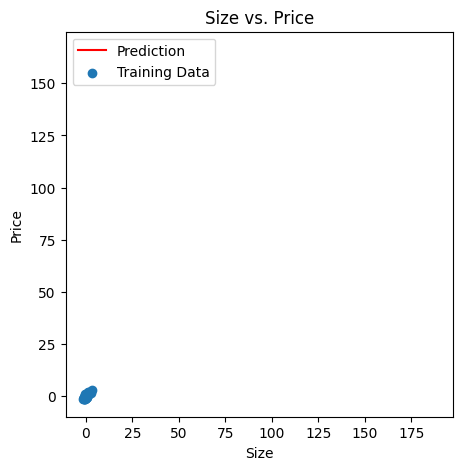

In [8]:
#To Ready Data Becuase Draw The Best Fit Line
data1=np.linspace(data.size.min(),data.size.max(),200)
print('The Data After Divided To 200 Equal Part Is ==> \n',data1)
#To Make Hypothesis Equation ==> h(Theta)= theta 0 + theta 1 * x 
f=g[0,0]+(g[0,1] * data1)
print('**'*50)
print('The Hypothesis Equation Result Is ==> \n',f)
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(data1, f, 'r', label='Prediction')
ax.scatter(data.Size, data.Price, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Size vs. Price')